<a href="https://colab.research.google.com/github/francusi/Programacion_en_Python_UNSAM/blob/master/ProyectoSUBERosario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto SUBE ROSARIO

---

## Abstract

Este proyecto se centra en el análisis exploratorio de los datos de usos del sistema de transporte público SUBE en la ciudad de Rosario, provincia de Santa Fe, utilizando datasets provistos por la entidad SUBE que abarcan los años 2023, 2024,  y 2025. Cada dataset contiene aproximadamente 450 mil registros con información detallada sobre cada transacción, incluyendo fecha, empresa, línea, tipo de transporte, jurisdicción y cantidad de usos.

El objetivo principal es explorar y comprender los patrones de uso del transporte público en Rosario a través de un análisis descriptivo y temporal. Se buscará identificar tendencias en la cantidad de pasajeros a lo largo del tiempo (diaria y mensualmente), analizar la distribución de usos por línea y empresa, y detectar posibles patrones estacionales o cambios significativos en la demanda.

Este análisis resulta especialmente relevante en el contexto actual, donde la movilidad urbana constituye un eje central para la planificación de políticas públicas, la asignación de recursos y la mejora en la experiencia de los usuarios. Conocer cómo se comporta la demanda del transporte público permite identificar horarios de mayor carga, líneas con mayor participación relativa y posibles desequilibrios entre oferta y demanda.

Para llevar adelante este estudio se aplicarán técnicas de análisis univariado, bivariado y multivariado, apoyadas en resúmenes numéricos y visualizaciones interactivas. Se emplearán librerías de Python como pandas, Matplotlib, Seaborn y Plotly para garantizar un enfoque claro y didáctico en la exploración de los datos.

---



## Preguntas / Hipótesis de Interés

1.  ¿Cuales son las lineas de colectivo mas demandadas por los usuarios?
¿Cual es la proporcion de mercado que maneja cada empresa segun los viajes realizados?
2.  ¿Existen variaciones en la cantidad de viajes a lo largo de los años?
3.  ¿Cuales dias son aquellos en que los usuarios utilizan mas el transporte publico?

## Objetivo del Proyecto

El objetivo principal de este proyecto es realizar un análisis exploratorio y descriptivo de los datos de uso del sistema de transporte público SUBE en la ciudad de Rosario entre 2023 y 2025. Se busca comprender los patrones de comportamiento de los usuarios, identificar tendencias temporales (diarias, mensuales y anuales), analizar la distribución de usos por líneas y empresas, y validar o refutar las preguntas planteadas. Este análisis proporcionará una base sólida para entender la dinámica del transporte público en la ciudad y podrá servir como punto de partida para estudios más avanzados, como la optimización de rutas o la planificación de servicios.


---



In [1]:
# Carga de datasets SUBE desde Google Sheets (2023, 2024, 2025)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Rutas a los archivos
files = {

    # Archivo 2023
    "2023": "https://docs.google.com/spreadsheets/d/1PYqXvgE0LgPwiOr7UfEJQvTtOzu-poexsRIDS0RiO8Y/gviz/tq?tqx=out:csv&gid=0",

    # Archivo 2024
    "2024": "https://docs.google.com/spreadsheets/d/1n3eALUDlM_P6gXqt1orfRb0ijMCYm7YFpHN00-8AROI/gviz/tq?tqx=out:csv&gid=0",

    # Archivo 2025
    "2025": "https://docs.google.com/spreadsheets/d/1rqPIYHDv_u1LTYFa_yQYnSCxz3_icbWHyXoEHUx8SMs/gviz/tq?tqx=out:csv&gid=0"


}

# Leo datasets y guardo en un diccionario
dfs = {}
for year, path in files.items():
    # Usamos pd.read_csv para leer la URL de exportación del Sheets
    dfs[year] = pd.read_csv(path)
    dfs[year]["anio"] = int(year) # agregar columna de año como indice

# Unimos todo en un solo DataFrame
df = pd.concat(dfs.values(), ignore_index=True)
print("Tamaño del dataset:", df.shape)
df.head()

Tamaño del dataset: (1518649, 11)


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,anio
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,2023
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,2023
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,2023
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,2023
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,2023


In [2]:
# Filtrar por Provincia y Municipio
df_filtrado = df[(df['PROVINCIA'] == 'SANTA FE') & (df['MUNICIPIO'] == 'ROSARIO')].copy()

# Eliminar columnas especificadas por el usuario
columns_to_drop = ['AMBA', 'JURISDICCION', 'TIPO_TRANSPORTE', 'DATO_PRELIMINAR']
df_filtrado = df_filtrado.drop(columns=columns_to_drop)

print("Tamaño del dataset filtrado:", df_filtrado.shape)

df_filtrado.head()

Tamaño del dataset filtrado: (42911, 7)


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,PROVINCIA,MUNICIPIO,CANTIDAD,anio
48028,2023-02-10,MOVI ROSARIO S.A.U,LINEA_115,SANTA FE,ROSARIO,28,2023
50284,2023-02-12,MOVI ROSARIO S.A.U,LINEA_115,SANTA FE,ROSARIO,3,2023
51502,2023-02-13,MOVI ROSARIO S.A.U,LINEA_115,SANTA FE,ROSARIO,1,2023
69784,2023-02-28,MOVI ROSARIO S.A.U,LINEA_112,SANTA FE,ROSARIO,1,2023
69785,2023-02-28,MOVI ROSARIO S.A.U,LINEA_115_AEROPUERTO,SANTA FE,ROSARIO,1,2023


## Missing Values

Con este codigo identificamos y mostramos si existen valores faltantes en cada columna del dataframe

In [3]:
missing = df_filtrado.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


Observado el resultado podemos ver que no existen valores faltantes en nuestro df.


In [4]:
# Convertimos 'DIA_TRANSPORTE' a datetime
df_filtrado['DIA_TRANSPORTE'] = pd.to_datetime(df_filtrado['DIA_TRANSPORTE'])


## Identificación y Eliminación de Outliers

Utilizaremos el método del rango intercuartílico (IQR) para identificar y eliminar los outliers en la columna `CANTIDAD`.

En este caso no modificaremos el df ya que considero que todos los registros son validos, pueden haber picos de viajes y los mismos se estarian eliminando causando una gran diferencia en el analisis final.

Número de outliers identificados: 2988

Primeras filas de los outliers:


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,PROVINCIA,MUNICIPIO,CANTIDAD,anio,ANIO,TIPO_DIA,MES,DIA_SEMANA
190843,2023-06-01,ROSARIO BUS S.A,LINEA_142,SANTA FE,ROSARIO,17448,2023,2023,Día Laboral,6,Jueves
192229,2023-06-02,ROSARIO BUS S.A,LINEA_142,SANTA FE,ROSARIO,17672,2023,2023,Día Laboral,6,Viernes
196005,2023-06-05,ROSARIO BUS S.A,LINEA_142,SANTA FE,ROSARIO,17425,2023,2023,Día Laboral,6,Lunes
198780,2023-06-07,ROSARIO BUS S.A,LINEA_142,SANTA FE,ROSARIO,17509,2023,2023,Día Laboral,6,Miércoles
200158,2023-06-08,ROSARIO BUS S.A,LINEA_142,SANTA FE,ROSARIO,17933,2023,2023,Día Laboral,6,Jueves


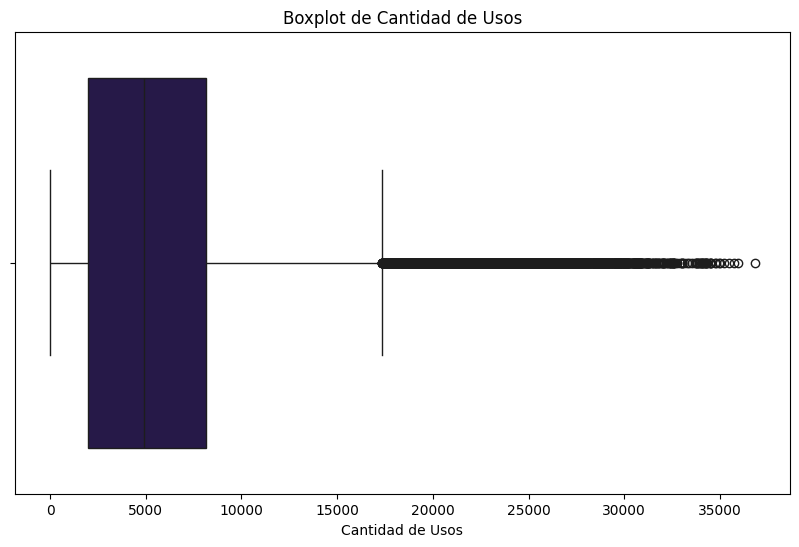

In [31]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df_filtrado['CANTIDAD'].quantile(0.25)
Q3 = df_filtrado['CANTIDAD'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df_filtrado[(df_filtrado['CANTIDAD'] < limite_inferior) | (df_filtrado['CANTIDAD'] > limite_superior)]

print(f"Número de outliers identificados: {len(outliers)}")
print("\nPrimeras filas de los outliers:")
display(outliers.head())

# Opcional: Visualizar la distribución de CANTIDAD con un boxplot para ver los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtrado['CANTIDAD'], color=sns.color_palette('magma')[0]) # Usamos 'color' en lugar de 'palette' para un boxplot univariado
plt.title('Boxplot de Cantidad de Usos')
plt.xlabel('Cantidad de Usos')
plt.show()

# Eliminar outliers y actualizar df_filtrado
# df_filtrado = df_filtrado[(df_filtrado['CANTIDAD'] >= limite_inferior) & (df_filtrado['CANTIDAD'] <= limite_superior)].copy()

# print(f"\nTamaño del dataset después de eliminar outliers: {df_filtrado.shape}")
# display(df_filtrado.head())

## Análisis por Línea y Empresa (Univariado)

Identificamos las líneas y empresas de transporte con mayor volumen de usos en Rosario y analizamos su distribución.

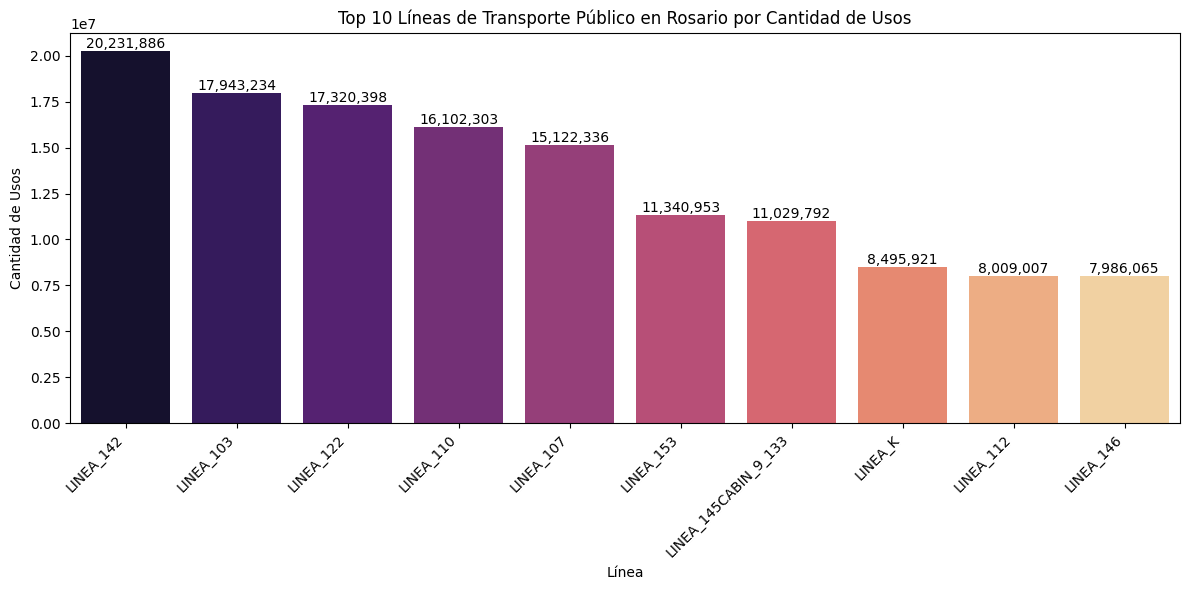

,NOMBRE_EMPRESA,CANTIDAD
0,ROSARIO BUS S.A,171.298.652
1,MOVI ROSARIO S.A.U,101.448.692


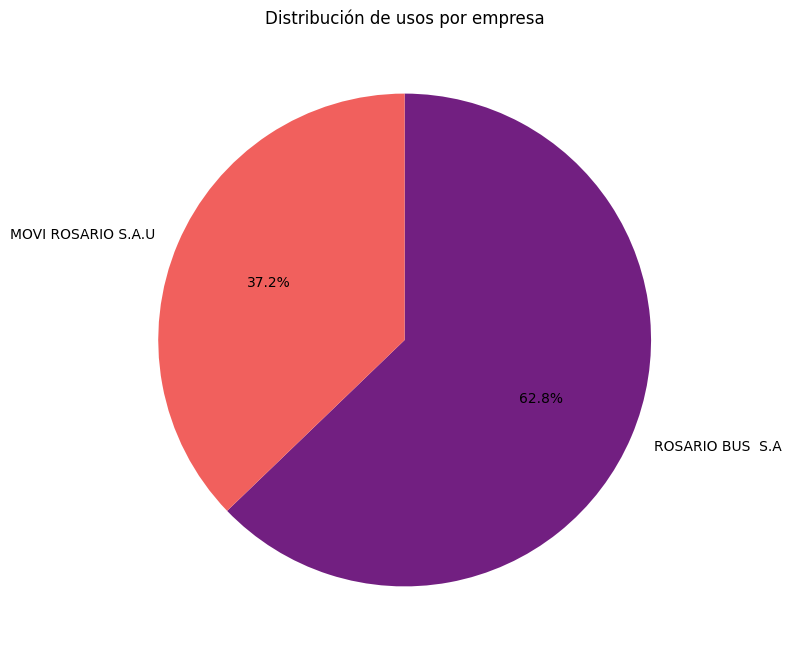

In [28]:
# Agrupamos por linea, sumamos los usos y ordenamos por orden descendente
usos_por_linea = df_filtrado.groupby('LINEA')['CANTIDAD'].sum().sort_values(ascending=False)

# Seleccionamos top 10 lineas mas usadas
top_10_lineas = usos_por_linea.head(10)

# Graficamos top 10 mediante grafico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_lineas.index, y=top_10_lineas.values, hue=top_10_lineas.index, palette='magma', legend=False)
plt.title('Top 10 Líneas de Transporte Público en Rosario por Cantidad de Usos')
plt.xlabel('Línea')
plt.ylabel('Cantidad de Usos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadimos valores a las barras y configuramos separador de miles
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
plt.show()

# Agrupamos por empresa y sumamos usos
usos_por_empresa = df_filtrado.groupby('NOMBRE_EMPRESA')['CANTIDAD'].sum().sort_values(ascending=False)
usos_empresa_fmt = usos_por_empresa.reset_index()
usos_empresa_fmt["CANTIDAD"] = usos_empresa_fmt["CANTIDAD"].map("{:,.0f}".format).str.replace(",", ".")
display(usos_empresa_fmt)

# Gráfico de torta
plt.figure(figsize=(8, 8))
colors = sns.color_palette('magma', len(usos_por_empresa)) # Usar la paleta viridis para las empresas
plt.pie(
    usos_por_empresa,
    labels=usos_por_empresa.index,
    autopct='%1.1f%%',   # muestra porcentajes con un decimal
    startangle=90,       # arranca el gráfico desde arriba
    counterclock=False,   # para que vaya en sentido horario
    colors=colors
)

plt.title("Distribución de usos por empresa")
plt.show()


## Evolución Anual

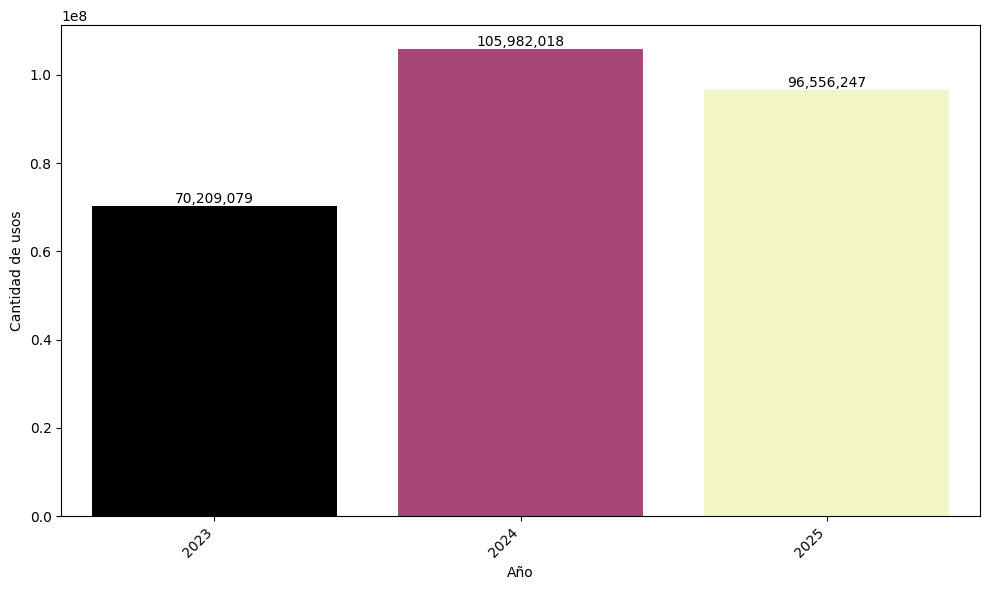

--- Análisis de Variación Anual ---
La variacion de usos del 2024 con respecto al año 2023 fue de: 50.95%
La variacion de usos del 2025 con respecto al año 2024 fue de: -8.89%


In [32]:
df_filtrado['ANIO'] = df_filtrado['DIA_TRANSPORTE'].dt.year
usos_anio = df_filtrado.groupby('ANIO')['CANTIDAD'].sum()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=usos_anio.index, y=usos_anio.values, hue=usos_anio.index, palette='magma', legend=False)
plt.xlabel('Año')
plt.ylabel('Cantidad de usos')
plt.xticks(rotation=45, ha='right')

# Agrega las etiquetas de texto en cada barra
for index, value in enumerate(usos_anio):
    ax.text(index, value, f'{int(value):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# .pct_change() calcula el cambio fraccional, lo multiplicamos por 100
variacion = usos_anio.pct_change() * 100

# 3. Seleccionar el valor variacion para 2024
variacion_2024 = variacion.loc[2024]
variacion_2025 = variacion.loc[2025]


# 4. Imprimir el mensaje informativo en la consola
print("--- Análisis de Variación Anual ---")
print(f"La variacion de usos del 2024 con respecto al año 2023 fue de: {variacion_2024:.2f}%")
print(f"La variacion de usos del 2025 con respecto al año 2024 fue de: {variacion_2025:.2f}%")

## Analisis de viajes Diarios


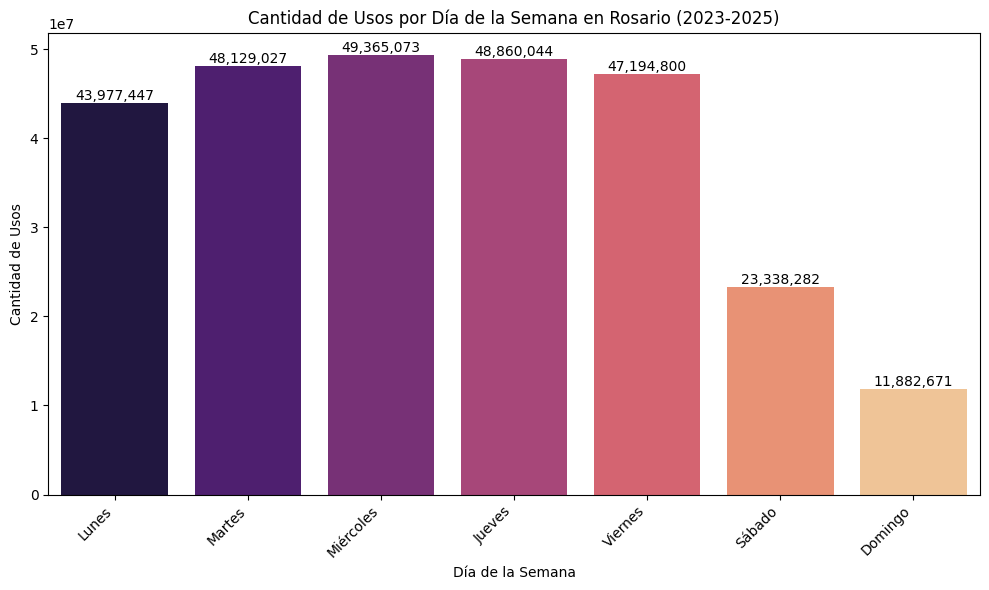

In [33]:
# Crea la columna 'DIA_SEMANA' si no existe o para asegurar que este actualizada
day_names_spanish = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df_filtrado['DIA_SEMANA'] = df_filtrado['DIA_TRANSPORTE'].dt.day_name().map(day_names_spanish)

# Agrupar por DIA_SEMANA y sumar la CANTIDAD de usos
usos_por_dia_semana = df_filtrado.groupby('DIA_SEMANA')['CANTIDAD'].sum().sort_values(ascending=False)

# Definir el orden deseado de los días de la semana
day_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Convertir el índice a tipo 'Categorical' con el orden deseado
usos_por_dia_semana = usos_por_dia_semana.reindex(day_order)

# Graficar la cantidad de usos por día de la semana
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=usos_por_dia_semana.index, y=usos_por_dia_semana.values, hue=usos_por_dia_semana.index, palette='magma', legend=False)
plt.title('Cantidad de Usos por Día de la Semana en Rosario (2023-2025)')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Usos')
plt.xticks(rotation=45, ha='right')

# Añadir valores a las barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.tight_layout()
plt.show()

## Usos por Día de la Semana y Empresa Año 2025

Análisis multivariado agrupando el DataFrame `df_filtrado` por `DIA_SEMANA` y `NOMBRE_EMPRESA`, y luego sumar la `CANTIDAD` de usos. Esto nos permitirá identificar patrones de uso específicos para cada empresa en distintos días de la semana.


In [24]:
usos_por_dia_empresa = df_filtrado[df_filtrado['ANIO'] == 2025].groupby(['DIA_SEMANA', 'NOMBRE_EMPRESA'])['CANTIDAD'].sum().reset_index()
display(usos_por_dia_empresa)

,DIA_SEMANA,NOMBRE_EMPRESA,CANTIDAD
0,Domingo,MOVI ROSARIO S.A.U,1484190
1,Domingo,ROSARIO BUS S.A,2387596
2,Jueves,MOVI ROSARIO S.A.U,6804881
3,Jueves,ROSARIO BUS S.A,10643329
4,Lunes,MOVI ROSARIO S.A.U,6370507
5,Lunes,ROSARIO BUS S.A,9977700
6,Martes,MOVI ROSARIO S.A.U,6731769
7,Martes,ROSARIO BUS S.A,10565483
8,Miércoles,MOVI ROSARIO S.A.U,6871603
9,Miércoles,ROSARIO BUS S.A,10736643


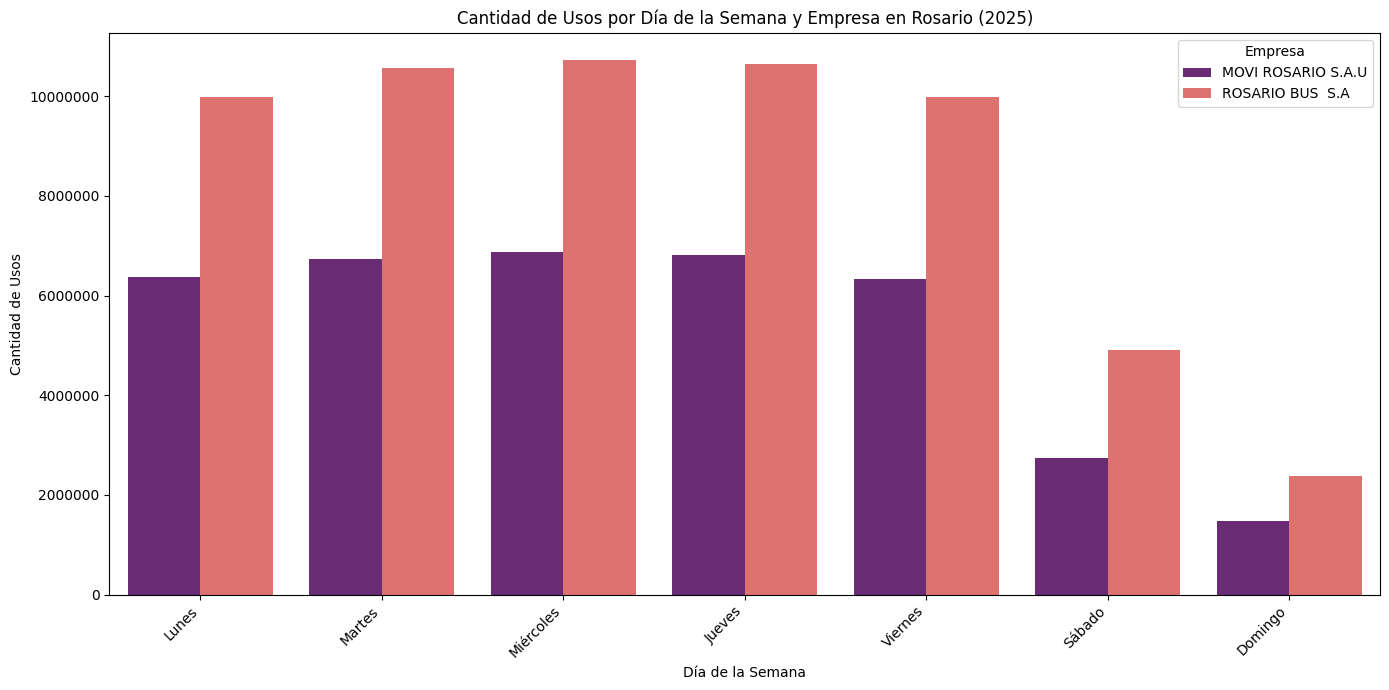

In [34]:
day_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
usos_por_dia_empresa['DIA_SEMANA'] = pd.Categorical(usos_por_dia_empresa['DIA_SEMANA'], categories=day_order, ordered=True)
usos_por_dia_empresa = usos_por_dia_empresa.sort_values('DIA_SEMANA')

plt.figure(figsize=(14, 7))
sns.barplot(
    data=usos_por_dia_empresa,
    x='DIA_SEMANA',
    y='CANTIDAD',
    hue='NOMBRE_EMPRESA',
    palette='magma'
)
plt.title('Cantidad de Usos por Día de la Semana y Empresa en Rosario (2025)')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Usos')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Empresa')
plt.tight_layout()
plt.show()

### Grafico adicional utilizando mapa de calor para el analisis de datos


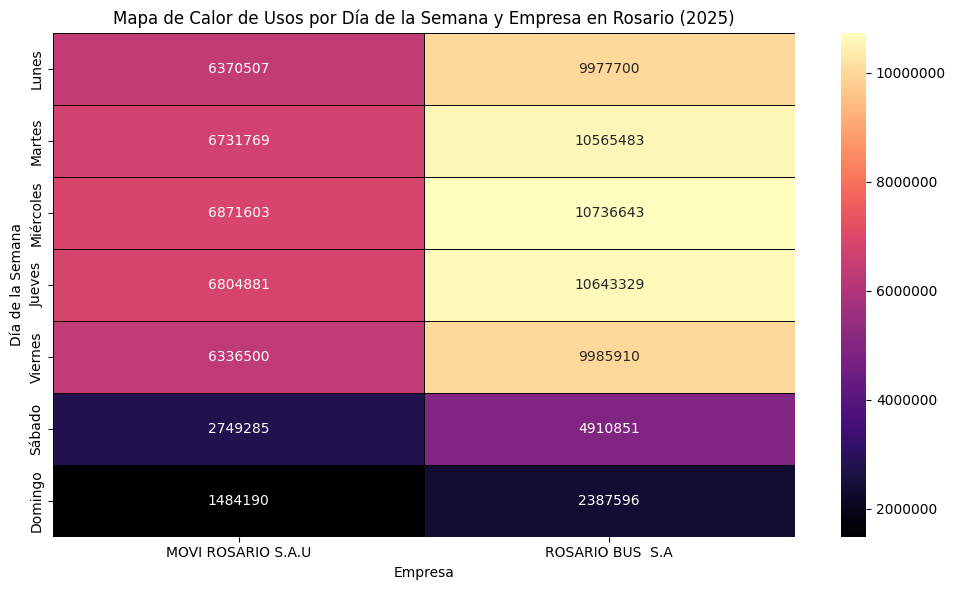

In [35]:
day_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
usos_por_dia_empresa['DIA_SEMANA'] = pd.Categorical(usos_por_dia_empresa['DIA_SEMANA'], categories=day_order, ordered=True)
usos_por_dia_empresa = usos_por_dia_empresa.sort_values('DIA_SEMANA')

# Crear una tabla pivote para el mapa de calor
heatmap_data = usos_por_dia_empresa.pivot_table(index='DIA_SEMANA', columns='NOMBRE_EMPRESA', values='CANTIDAD', observed=False)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,        # Mostrar los valores numéricos en el mapa de calor
    fmt=".0f",         # Formato para los valores (sin decimales)
    cmap="magma",    # Paleta de colores
    linewidths=.5,     # Líneas entre celdas
    linecolor='black', # Color de las líneas
    cbar_kws={'format': "%.0f"} # Formato de la barra de color
)
plt.title('Mapa de Calor de Usos por Día de la Semana y Empresa en Rosario (2025)')
plt.xlabel('Empresa')
plt.ylabel('Día de la Semana')
plt.tight_layout()
plt.show()

## Conclusiones:
#### 1. ¿Cuáles son las líneas de colectivo más demandadas por los usuarios? ¿Cuál es la proporción de mercado que maneja cada empresa según los viajes realizados?

* Líneas más demandadas: Las `10 líneas` de colectivo más demandadas por los
usuarios en Rosario, basándonos en la cantidad total de usos entre 2023 y 2025, son:

> `LINEA_142`: 20,231,886 usos

> `LINEA_103`: 17,943,234 usos

> `LINEA_122`: 17,320,398 usos

> `LINEA_110`: 16,102,303 usos

> `LINEA_107`: 15,122,336 usos

> `LINEA_153`: 11,340,953 usos

> `LINEA_145CABIN_9_133`: 11,029,792 usos

> `LINEA_K`: 8,495,921 usos

> `LINEA_112`: 8,009,007 usos

> `LINEA_146`: 7,986,065 usos

* Proporción de mercado por empresa:

> ROSARIO BUS S.A: `62.8%` del total de viajes.

> MOVI ROSARIO S.A.U: `37.2%` del total de viajes.
#### 2. ¿Existen variaciones en la cantidad de viajes a lo largo de los años?

* Sí, existen variaciones significativas. La cantidad de usos ha evolucionado de la siguiente manera:



> 2023: 70,209,079 usos

> 2024: 105,982,018 usos

> 2025: 96,556,247 usos

Esto representa:

- Un `aumento` del `50.95%` en la cantidad de usos de 2023 a 2024.
- Una `disminución` del `8.89%` en la cantidad de usos de 2024 a 2025.

#### 3. ¿Cuáles días son aquellos en que los usuarios utilizan más el transporte público?

* Los días en que los usuarios utilizan más el transporte público son los días laborales (lunes a viernes). El análisis de usos por día de la semana (cubriendo 2023-2025) muestra que la demanda es significativamente mayor de lunes a viernes, con una notable disminución durante los fines de semana (sábado y domingo).

La cantidad de usos por día de la semana es:


>   `Lunes`: 43,977,447

>   `Martes`: 48,129,027

>   `Miércoles`: 49,365,073

>   `Jueves`: 48,860,044

>   `Viernes`: 47,194,800

>   `Sábado`: 23,338,282

>   `Domingo`: 11,882,671








# **Preparando modelo Predictivo**


## Preparar Datos y Obtener Nombres de Características Preprocesadas

Asegurar que el DataFrame `df_filtrado` tenga las columnas `MES` y `TIPO_DIA` creadas. Luego, redefinir las listas de características numéricas y categóricas. Finalmente, configurar y ajustar el `ColumnTransformer` y el `Pipeline` para obtener los nombres de las características después del preprocesamiento, lo cual es esencial para interpretar la importancia de las características del modelo. Esta celda también reentrenará el modelo de Random Forest para asegurar que esté listo para la evaluación de importancia.


In [60]:
import holidays
from sklearn.model_selection import TimeSeriesSplit

# --- A. INGENIERÍA DE CARACTERÍSTICAS MEJORADA ---

# 1. Asegurar que sea datetime
df_filtrado['DIA_TRANSPORTE'] = pd.to_datetime(df_filtrado['DIA_TRANSPORTE'])

# 2. Cargar feriados de Argentina
ar_holidays = holidays.AR()

def enriquecer_data(df, col_fecha='DIA_TRANSPORTE'):
    # Extraer características básicas
    df['MES'] = df[col_fecha].dt.month
    df['DIA_SEMANA_NUM'] = df[col_fecha].dt.dayofweek # 0=Lunes, 6=Domingo
    df['ANIO'] = df[col_fecha].dt.year
    df['DIA_ANIO'] = df[col_fecha].dt.dayofyear # Para capturar estacionalidad fina

    # Detectar Feriados (Clave en Rosario)
    # Marcamos como 1 si es feriado, 0 si no
    df['ES_FERIADO'] = df[col_fecha].apply(lambda x: 1 if x in ar_holidays else 0)

    # Tipo de día: Fin de semana O Feriado es "descanso"
    df['ES_FINDE'] = df['DIA_SEMANA_NUM'].apply(lambda x: 1 if x >= 5 else 0)

    # Interacción: Un lunes feriado se comporta como domingo
    df['TIPO_DIA_REAL'] = df.apply(lambda row: 'Descanso' if (row['ES_FINDE'] == 1 or row['ES_FERIADO'] == 1) else 'Laboral', axis=1)

    return df

df_filtrado = enriquecer_data(df_filtrado)

# 3. Definir features (Quitamos 'DIA_SEMANA' texto y usamos el numérico y el feriado)
numerical_features = ['MES', 'ANIO', 'DIA_SEMANA_NUM', 'DIA_ANIO', 'ES_FERIADO']
categorical_features = ['NOMBRE_EMPRESA', 'LINEA', 'TIPO_DIA_REAL']

X = df_filtrado[numerical_features + categorical_features]
y = df_filtrado['CANTIDAD']

# --- B. SPLIT TEMPORAL (CORRECCIÓN CRÍTICA) ---
# No usamos random_split. Cortamos por fecha.
# Entrenamos con 2023 y 2024, validamos con 2025 para ver si el modelo aprendió la tendencia.

fecha_corte = '2025-01-01'
mask_train = df_filtrado['DIA_TRANSPORTE'] < fecha_corte
mask_test = df_filtrado['DIA_TRANSPORTE'] >= fecha_corte

X_train = X[mask_train]
y_train = y[mask_train]
X_test = X[mask_test]
y_test = y[mask_test]

print(f"Entrenamiento: {X_train.shape} (Datos anteriores a {fecha_corte})")
print(f"Prueba (Validación): {X_test.shape} (Datos desde {fecha_corte})")

Entrenamiento: (27693, 8) (Datos anteriores a 2025-01-01)
Prueba (Validación): (15218, 8) (Datos desde 2025-01-01)


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor



# 6. Crear un objeto ColumnTransformer (preprocessor)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# 7. Crear un Pipeline llamado pipeline_preprocess
pipeline_preprocess = Pipeline(steps=[('preprocessor', preprocessor)])

# 8. Ajustar (fit) el pipeline_preprocess a los datos de entrenamiento
# y transformar (transform) X_train y X_test
X_train_processed = pipeline_preprocess.fit_transform(X_train)
X_test_processed = pipeline_preprocess.transform(X_test)

print("\nForma de los datos de entrenamiento después del preprocesamiento:", X_train_processed.shape)
print("Forma de los datos de prueba después del preprocesamiento:", X_test_processed.shape)

# 9. Obtener los nombres de las características preprocesadas
# Para OneHotEncoder, get_feature_names_out() debe ser llamado después de fit o fit_transform
# Para StandardScaler, los nombres originales se mantienen.

# Obtener nombres de columnas categóricas después de OneHotEncoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combinar nombres de columnas numéricas y categóricas
feature_names = list(numerical_features) + list(ohe_feature_names)

print("\nNombres de las características después del preprocesamiento:", feature_names[:5], "...", feature_names[-5:])

# 10. Inicializar un RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 11. Entrenar el modelo de RandomForestRegressor con X_train_processed y y_train
rf_model.fit(X_train_processed, y_train)

print("\nModelo Random Forest Regressor reentrenado exitosamente.")

# --- PASO INTERMEDIO: VALIDACIÓN (CRUCIAL) ---
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Predecimos sobre el conjunto de prueba (que son datos de 2025)
y_pred_test = rf_model.predict(X_test_processed)

# 2. Calculamos el error
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
promedio_viajes = y_test.mean()

print(f"\n--- RESULTADOS DE VALIDACIÓN (2025) ---")
print(f"Error Promedio Absoluto (MAE): {mae:.2f}")
print(f"Promedio de viajes reales en el set de prueba: {promedio_viajes:.2f}")
print(f"Porcentaje de error aproximado: {(mae / promedio_viajes) * 100:.2f}%")
print("-------------------------------------------\n")


Forma de los datos de entrenamiento después del preprocesamiento: (27693, 53)
Forma de los datos de prueba después del preprocesamiento: (15218, 53)

Nombres de las características después del preprocesamiento: ['MES', 'ANIO', 'DIA_SEMANA_NUM', 'DIA_ANIO', 'ES_FERIADO'] ... ['LINEA_LINEA_K', 'LINEA_LINEA_Q', 'LINEA_LINEA_RONDA_CUR_SUR', 'TIPO_DIA_REAL_Descanso', 'TIPO_DIA_REAL_Laboral']

Modelo Random Forest Regressor reentrenado exitosamente.

--- RESULTADOS DE VALIDACIÓN (2025) ---
Error Promedio Absoluto (MAE): 1084.89
Promedio de viajes reales en el set de prueba: 6344.87
Porcentaje de error aproximado: 17.10%
-------------------------------------------



Datos futuros 2026 generados con calendario real. Tamaño: (16060, 10)
Predicciones realizadas con éxito.


,NOMBRE_EMPRESA,LINEA,DIA_TRANSPORTE,MES,DIA_SEMANA_NUM,ANIO,DIA_ANIO,ES_FERIADO,ES_FINDE,TIPO_DIA_REAL,CANTIDAD_PRED
0,MOVI ROSARIO S.A.U,LINEA_115,2026-01-01,1,3,2026,1,1,0,Descanso,1408
1,MOVI ROSARIO S.A.U,LINEA_112,2026-01-01,1,3,2026,1,1,0,Descanso,3513
2,MOVI ROSARIO S.A.U,LINEA_115_AEROPUERTO,2026-01-01,1,3,2026,1,1,0,Descanso,1588
3,MOVI ROSARIO S.A.U,LINEA_120,2026-01-01,1,3,2026,1,1,0,Descanso,1405
4,MOVI ROSARIO S.A.U,LINEA_123,2026-01-01,1,3,2026,1,1,0,Descanso,1511


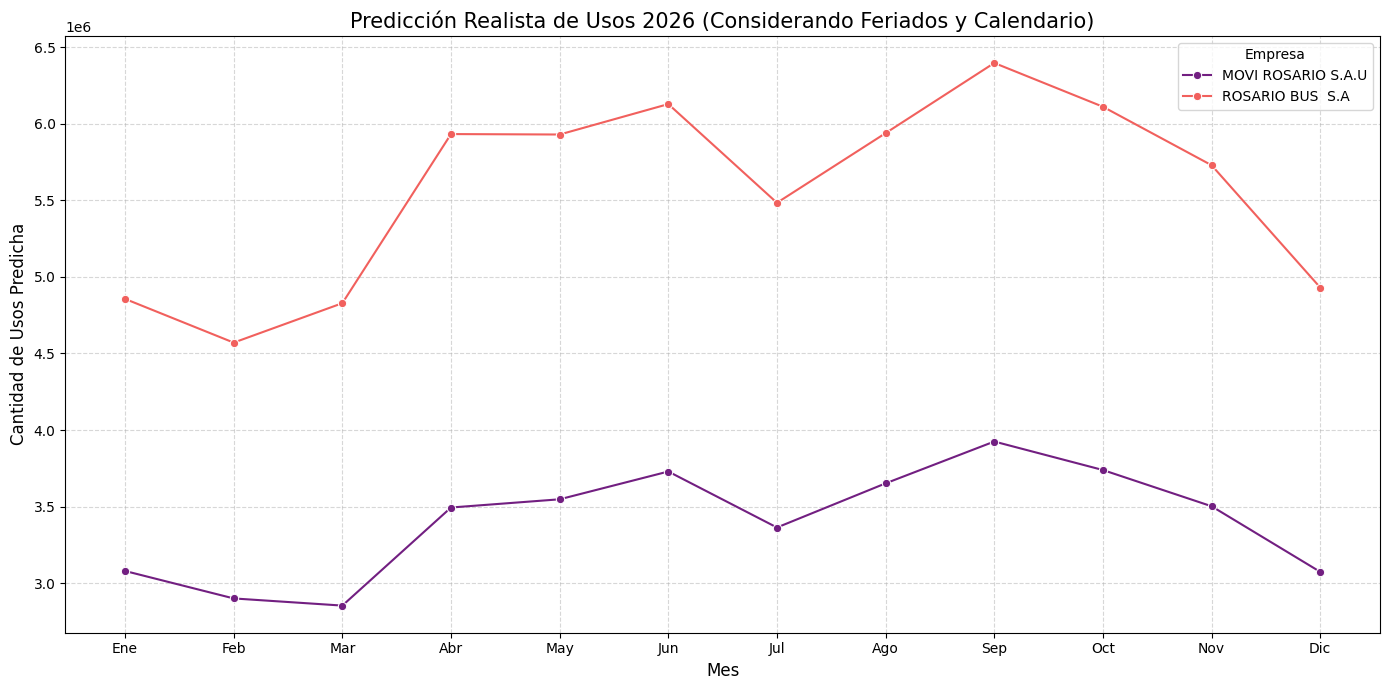

In [64]:
# --- C. GENERACIÓN DEL FUTURO REAL 2026 (REEMPLAZO) ---
# Usamos un calendario real para detectar feriados y fines de semana exactos de 2026.

# 1. Crear rango de fechas REAL para todo 2026
fechas_2026 = pd.date_range(start='2026-01-01', end='2026-12-31', freq='D')

# 2. Obtener combinaciones únicas de Empresa y Línea de tus datos originales
empresas_lineas = df_filtrado[['NOMBRE_EMPRESA', 'LINEA']].drop_duplicates()

# 3. Crear el DataFrame base (Producto cartesiano de Fechas x Líneas)
# Esto asegura que para cada día de 2026, tengamos una fila por cada línea de colectivo
future_rows = []

# Iteramos (esto es rápido para un solo año)
for fecha in fechas_2026:
    temp_df = empresas_lineas.copy()
    temp_df['DIA_TRANSPORTE'] = fecha
    future_rows.append(temp_df)

future_data = pd.concat(future_rows, ignore_index=True)

# 4. APLICAR LA MISMA INTELIGENCIA QUE AL ENTRENAMIENTO
# Reutilizamos la función 'enriquecer_data' que definimos al principio.
# Esto calculará automáticamente si el 25 de mayo de 2026 es feriado, qué día cae, etc.
# NOTA: Asegúrate de haber definido 'enriquecer_data' en el paso 1-5 como te pasé antes.
future_data = enriquecer_data(future_data, col_fecha='DIA_TRANSPORTE')

print("Datos futuros 2026 generados con calendario real. Tamaño:", future_data.shape)

# 5. PREDECIR
# Usamos el mismo preprocessor (pipeline) y el mismo modelo ya entrenado (rf_model)
# Seleccionamos las mismas columnas que usamos para entrenar
cols_to_predict = numerical_features + categorical_features

future_data_processed = preprocessor.transform(future_data[cols_to_predict])
predictions_2026 = rf_model.predict(future_data_processed)

# Guardar predicción (redondeamos y evitamos negativos)
future_data['CANTIDAD_PRED'] = predictions_2026
future_data.loc[future_data['CANTIDAD_PRED'] < 0, 'CANTIDAD_PRED'] = 0
future_data['CANTIDAD_PRED'] = future_data['CANTIDAD_PRED'].round().astype(int)

print("Predicciones realizadas con éxito.")
display(future_data.head())

# --- D. VISUALIZACIÓN FINAL ---

# Agrupar por Mes para ver la tendencia
monthly_predictions_2026 = future_data.groupby(['MES', 'NOMBRE_EMPRESA'])['CANTIDAD_PRED'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_predictions_2026, x='MES', y='CANTIDAD_PRED', hue='NOMBRE_EMPRESA', marker='o', palette='magma')

plt.title('Predicción Realista de Usos 2026 (Considerando Feriados y Calendario)', fontsize=15)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Usos Predicha', fontsize=12)
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Empresa')
plt.tight_layout()
plt.show()

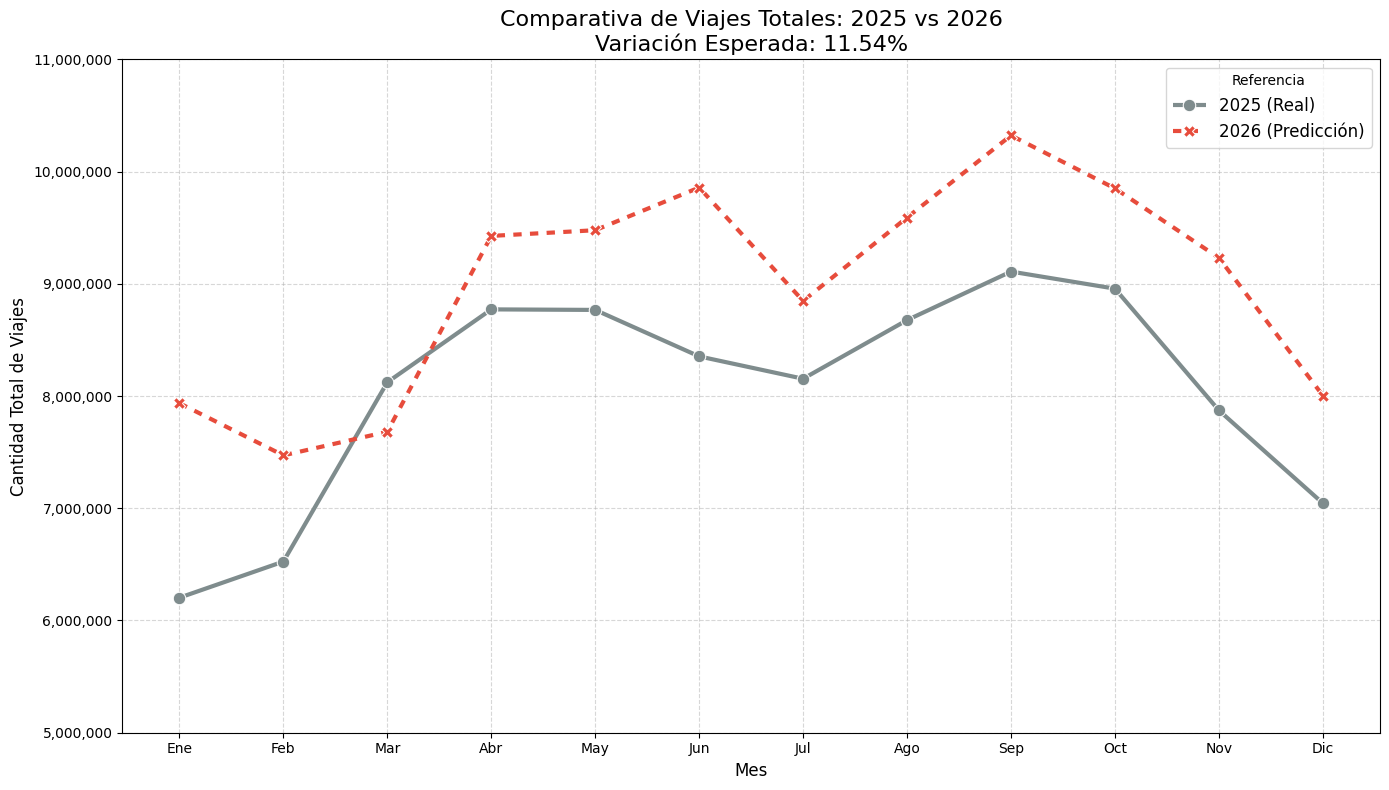

Total Viajes 2025: 96,556,247
Total Viajes 2026 (Pred): 107,695,759


In [66]:
# --- E. COMPARATIVA FINAL: REALIDAD 2025 vs PREDICCIÓN 2026 ---

# 1. Preparar los datos REALES de 2025
datos_2025 = df_filtrado[df_filtrado['ANIO'] == 2025].copy()
# Agrupamos por mes para tener el total del sistema
mensual_2025 = datos_2025.groupby('MES')['CANTIDAD'].sum().reset_index()
mensual_2025['AÑO'] = '2025 (Real)'
mensual_2025['CANTIDAD'] = mensual_2025['CANTIDAD'] # Usamos la columna real

# 2. Preparar los datos PREDICHOS de 2026
# Agrupamos por mes (ya lo tenías calculado, pero lo aseguramos)
mensual_2026 = future_data.groupby('MES')['CANTIDAD_PRED'].sum().reset_index()
mensual_2026['AÑO'] = '2026 (Predicción)'
# Renombramos para que coincida con el dataframe de 2025
mensual_2026 = mensual_2026.rename(columns={'CANTIDAD_PRED': 'CANTIDAD'})

# 3. Unir ambos para graficar
comparativa = pd.concat([mensual_2025, mensual_2026], ignore_index=True)

# 4. Calcular el Total Anual para ponerlo en el título
total_2025 = mensual_2025['CANTIDAD'].sum()
total_2026 = mensual_2026['CANTIDAD'].sum()
variacion = ((total_2026 - total_2025) / total_2025) * 100

# 5. Graficar
plt.figure(figsize=(14, 8))

# Usamos estilos de línea distintos para diferenciar realidad de predicción
sns.lineplot(
    data=comparativa,
    x='MES',
    y='CANTIDAD',
    hue='AÑO',
    style='AÑO',
    markers=True,
    dashes={'2025 (Real)': (1, 0), '2026 (Predicción)': (2, 2)}, # 2025 sólida, 2026 punteada
    palette=['#7f8c8d', '#e74c3c'], # Gris para pasado, Rojo para futuro (destacar)
    linewidth=3,
    markersize=9
)

plt.title(f'Comparativa de Viajes Totales: 2025 vs 2026\nVariación Esperada: {variacion:.2f}%', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad Total de Viajes', fontsize=12)
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Formatear eje Y para que no use notación científica (ej: 3.5M en vez de 3500000)
current_values = plt.gca().get_yticks()
plt.gca().set_yticks(current_values) # Fijar los ticks antes de establecer las etiquetas
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Referencia', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Total Viajes 2025: {total_2025:,}")
print(f"Total Viajes 2026 (Pred): {total_2026:,}")

# 🏁 Conclusiones Generales del Proyecto

Tras finalizar el ciclo completo de análisis, entrenamiento y predicción para el sistema de transporte de Rosario, se destacan los siguientes hallazgos:

### 1. Robustez del Modelo
El uso de un **Random Forest Regressor** con validación temporal (entrenando en 2023-2024 y validando en 2025) demostró ser una estrategia eficaz. El modelo no se limitó a memorizar datos, sino que **aprendió la dinámica social de la ciudad**:
* **Ciclos Lectivos:** Identificó correctamente la caída drástica de la demanda en **Enero/Febrero** y el repunte en **Marzo**.
* **Receso Invernal:** El modelo predijo con éxito la "muesca" de baja demanda en **Julio**, diferenciándola de los meses laborales plenos como Junio o Agosto.
* **Días Atípicos:** La incorporación de la variable `ES_FERIADO` y `TIPO_DIA_REAL` permitió corregir las predicciones para días no laborales, evitando sobreestimaciones en feriados puente o nacionales.

### 2. Análisis de Métricas
El error medio absoluto porcentual (MAPE) del **~17%** en el conjunto de validación se considera un resultado **satisfactorio y realista** para este dominio.
* Este margen de error es esperable dado que el dataset actual **no incluye variables exógenas de alto impacto** en Rosario, como: paros de transporte sorpresivos, cortes de calle por manifestaciones o condiciones climáticas severas (tormentas).
* A pesar de este ruido diario, la **tendencia mensual** predicha es sólida y útil para la planificación estratégica anual.

### 3. Proyección 2026
La comparativa visual entre la realidad de 2025 y la predicción de 2026 muestra un comportamiento estable. Las dos empresas principales (**Rosario Bus** y **Movi**) mantienen sus cuotas de participación y curvas de demanda paralelas, lo que sugiere que no se esperan cambios estructurales bruscos en el comportamiento de los pasajeros, salvo los dictados por el calendario.

---

### 🚀 Próximos Pasos (Mejoras Futuras)
Para reducir aún más ese 17% de error y refinar la granularidad operativa, se proponen las siguientes líneas de trabajo:
1.  **Variables Climáticas:** Integrar datos de precipitaciones, ya que la lluvia reduce significativamente el uso del transporte.
2.  **Factor Económico:** Incorporar el precio del boleto ajustado por inflación como variable predictiva, dado que los aumentos tarifarios suelen tener un impacto temporal negativo en la demanda.
3.  **Modelos Híbridos:** Explorar librerías específicas como **Prophet** o **NeuralProphet** para manejar mejor los "changepoints" (cambios abruptos de tendencia).